In [25]:
%matplotlib inline
import numpy as np
import kwant
from matplotlib import pyplot as plt

In [136]:
def make_system(t=1.0, dis = 0.3, salt='abc', W=15, L=30):
    # Makes a 2d wire with a disordered segmentegion.
    lat = kwant.lattice.square(1)
    sys = kwant.Builder()
    
    
    #### Define the scattering region. ####
    onsite = lambda site: 4 * t - (2 * uniform(repr(site), salt) - 1) * dis
    rectangle = lambda pos: 0 <= pos[0] < L and 0 <= pos[1] < W
    sys[lat.shape(rectangle, (0, 0))] = onsite
    sys[lat.neighbors()] = -t


    #### Define and attach the leads. ####
    # Construct the left lead.
    lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    lead[(lat(0, j) for j in xrange(W))] = 4 * t
    lead[lat.neighbors()] = -t

    # Attach the left lead and its reversed copy.
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed())

    return sys

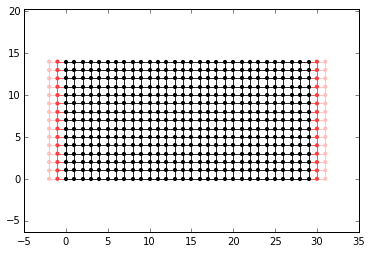

In [87]:
kwant.plot(make_system());

In [141]:
# Compute the scattering matrix
wire = make_system().finalized()
s = kwant.smatrix(wire, energy = 0.8)

In [158]:
# Select a given block of the scattering matrix
transmission_matrix = s.submatrix(1, 0)
reflection_matrix = s.submatrix(0, 0)
print(transmission_matrix.shape)
print(reflection_matrix.shape)

(4, 4)
(4, 4)


In [159]:
# NumPy svd
U, ts, V = np.linalg.svd(transmission_matrix, full_matrices=True)
W, rs, Z = np.linalg.svd(reflection_matrix, full_matrices=True)
# A similar routine is available with SciPy, scipy.linalg.svd
# numpy.linalg and scipy.linalg contain other routines for eigenvalues, eigenvectors, etc...

In [150]:
print(ts) # Transmission eigenvalues
print(rs) # Reflection eigenvalues

[ 0.99926078  0.98151397  0.93980332  0.90585404]
[ 0.42358997  0.34171586  0.19139051  0.03844339]


In [149]:
np.sum(ts**2 + rs**2) # Unitarity check

3.9999999999999933

In [152]:
# Below I plot the total transmission versus the energy, computed via the method smatrix.transmission()
data = []
energies = [0.002 * i for i in xrange(500)]
for energy in energies:
    smatrix = kwant.smatrix(wire, energy)
    data.append(smatrix.transmission(1, 0))

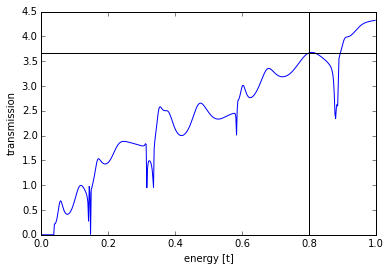

In [156]:
plt.figure()
plt.plot(energies, data)
plt.xlabel("energy [t]")
plt.ylabel("transmission")
plt.axvline(0.8, c='k')
plt.axhline(np.sum(t**2), c='k')
plt.show()